# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import datetime
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
city_data_df1 = pd.DataFrame({"City": cities})

city_data_df1["Country"] = ""
city_data_df1["Date"] = ""      
city_data_df1["Latitude"] = ""
city_data_df1["Longitude"] = ""
city_data_df1["Cloudiness (%)"] = ""
city_data_df1["Humidity (%)"] = ""
city_data_df1["Max Temp (F)"] = ""
city_data_df1["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in city_data_df1.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        city_data_df1.loc[index, "Country"] = weather_response["sys"]["country"]     
        city_data_df1.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        city_data_df1.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        city_data_df1.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        city_data_df1.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        city_data_df1.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        city_data_df1.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        city_data_df1.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | elk city.
Processing Record 1  of Set 1 | conceicao do araguaia.
Processing Record 2  of Set 1 | mataura.
Processing Record 3  of Set 1 | bredasdorp.
Processing Record 4  of Set 1 | dakar.
Processing Record 5  of Set 1 | busselton.
Processing Record 6  of Set 1 | guilin.
Processing Record 7  of Set 1 | nome.
Processing Record 8  of Set 1 | bluff.
Processing Record 9  of Set 1 | qaanaaq.
Processing Record 10  of Set 1 | illoqqortoormiut.
City not found...skipping illoqqortoormiut.
Processing Record 11  of Set 1 | souillac.
Processing Record 12  of Set 1 | rikitea.
Processing Record 13  of Set 1 | kavaratti.
Processing Record 14  of Set 1 | talnakh.
Processing Record 15  of Set 1 | barrow.
Processing Record 16  of Set 1 | belyy yar.
Processing Record 17  of Set 1 | vila franca do campo.
Processing Record 18  of Set 1 | carballo.
Processing Record 19  of Set 1 | cayenne.
Processing Record 20  of Set 1 |

Processing Record 26  of Set 4 | port blair.
Processing Record 27  of Set 4 | maniitsoq.
Processing Record 28  of Set 4 | nizhneyansk.
City not found...skipping nizhneyansk.
Processing Record 29  of Set 4 | perth.
Processing Record 30  of Set 4 | hilo.
Processing Record 31  of Set 4 | cabo san lucas.
Processing Record 32  of Set 4 | namibe.
Processing Record 33  of Set 4 | okhotsk.
Processing Record 34  of Set 4 | margate.
Processing Record 35  of Set 4 | saint-pierre.
Processing Record 36  of Set 4 | tazovskiy.
Processing Record 37  of Set 4 | buala.
Processing Record 38  of Set 4 | talakan.
Processing Record 39  of Set 4 | kimbe.
Processing Record 40  of Set 4 | camargo.
Processing Record 41  of Set 4 | garachine.
Processing Record 42  of Set 4 | victoria.
Processing Record 43  of Set 4 | lamar.
Processing Record 44  of Set 4 | ozgon.
City not found...skipping ozgon.
Processing Record 45  of Set 4 | waingapu.
Processing Record 46  of Set 4 | hamilton.
Processing Record 47  of Set 4 |

Processing Record 9  of Set 8 | oulainen.
Processing Record 10  of Set 8 | burnie.
Processing Record 11  of Set 8 | ahipara.
Processing Record 12  of Set 8 | nurota.
Processing Record 13  of Set 8 | tadine.
Processing Record 14  of Set 8 | komsomolskiy.
Processing Record 15  of Set 8 | asfi.
Processing Record 16  of Set 8 | hobyo.
Processing Record 17  of Set 8 | wilmington.
Processing Record 18  of Set 8 | batagay.
Processing Record 19  of Set 8 | severobaykalsk.
Processing Record 20  of Set 8 | erdemli.
Processing Record 21  of Set 8 | samana.
Processing Record 22  of Set 8 | christchurch.
Processing Record 23  of Set 8 | prince rupert.
Processing Record 24  of Set 8 | komsomolskoye.
Processing Record 25  of Set 8 | araouane.
Processing Record 26  of Set 8 | whitianga.
Processing Record 27  of Set 8 | sakakah.
Processing Record 28  of Set 8 | pisco.
Processing Record 29  of Set 8 | ahuimanu.
Processing Record 30  of Set 8 | chifeng.
Processing Record 31  of Set 8 | pangai.
Processing

Processing Record 38  of Set 11 | laguna.
Processing Record 39  of Set 11 | apricena.
Processing Record 40  of Set 11 | hami.
Processing Record 41  of Set 11 | sheridan.
Processing Record 42  of Set 11 | ucluelet.
Processing Record 43  of Set 11 | khash.
Processing Record 44  of Set 11 | yarada.
Processing Record 45  of Set 11 | camacha.
Processing Record 46  of Set 11 | chokwe.
Processing Record 47  of Set 11 | ambanja.
Processing Record 48  of Set 11 | amposta.
Processing Record 49  of Set 11 | iberia.
Processing Record 0  of Set 12 | malmyzh.
Processing Record 1  of Set 12 | manokwari.
Processing Record 2  of Set 12 | fethiye.
Processing Record 3  of Set 12 | phan rang.
City not found...skipping phan rang.
Processing Record 4  of Set 12 | mandiana.
Processing Record 5  of Set 12 | qui nhon.
Processing Record 6  of Set 12 | along.
Processing Record 7  of Set 12 | brenes.
Processing Record 8  of Set 12 | iranshahr.
Processing Record 9  of Set 12 | borba.
Processing Record 10  of Set 1

In [6]:
# Data Count

city_data_df = city_data_df1.dropna()

city_data_df.count()

City                621
Country             621
Date                621
Latitude            621
Longitude           621
Cloudiness (%)      621
Humidity (%)        621
Max Temp (F)        621
Wind Speed (mph)    621
dtype: int64

In [7]:
# Display DataFrame
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,elk city,US,2023-03-28 12:03:24,35.412,-99.4043,0,52,43.052,7.72
1,conceicao do araguaia,BR,2023-03-28 12:03:25,-8.2578,-49.2647,50,64,86.018,2.92
2,mataura,NZ,2023-03-28 12:03:25,-46.1927,168.8643,47,84,44.744,0.67
3,bredasdorp,ZA,2023-03-28 12:03:25,-34.5322,20.0403,38,67,65.714,6.37
4,dakar,SN,2023-03-28 12:03:25,14.6937,-17.4441,7,74,101.552,6.09


In [8]:
# Convert data strings to float
pd.to_numeric(city_data_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(city_data_df["Humidity (%)"]).astype(float)
pd.to_numeric(city_data_df["Latitude"]).astype(float)
pd.to_numeric(city_data_df["Longitude"]).astype(float)
pd.to_numeric(city_data_df["Max Temp (F)"]).astype(float)
pd.to_numeric(city_data_df["Wind Speed (mph)"]).astype(float)
city_data_df

#Export DataFrame to CSV File
city_data_df.to_csv("weather_df.csv")
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,elk city,US,2023-03-28 12:03:24,35.4120,-99.4043,0.0,52.0,43.052,7.72
1,conceicao do araguaia,BR,2023-03-28 12:03:25,-8.2578,-49.2647,50.0,64.0,86.018,2.92
2,mataura,NZ,2023-03-28 12:03:25,-46.1927,168.8643,47.0,84.0,44.744,0.67
3,bredasdorp,ZA,2023-03-28 12:03:25,-34.5322,20.0403,38.0,67.0,65.714,6.37
4,dakar,SN,2023-03-28 12:03:25,14.6937,-17.4441,7.0,74.0,101.552,6.09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

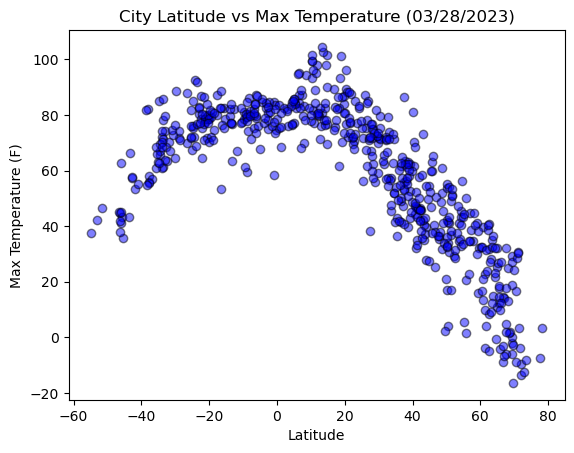

In [10]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

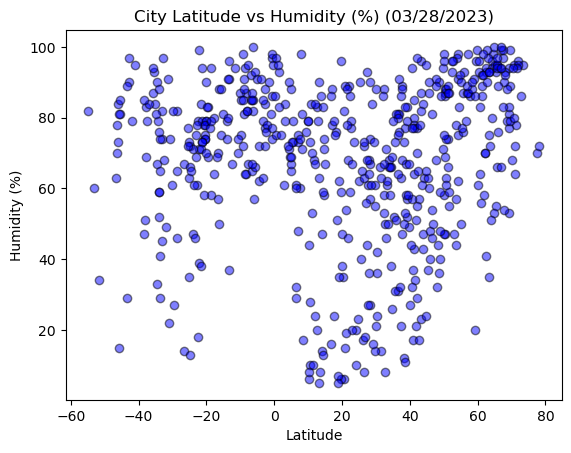

In [11]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

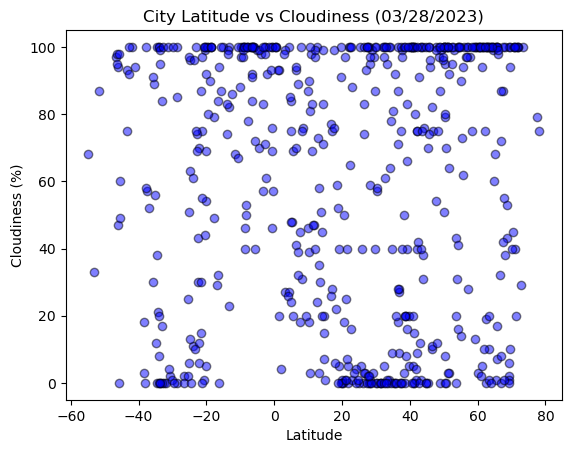

In [12]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

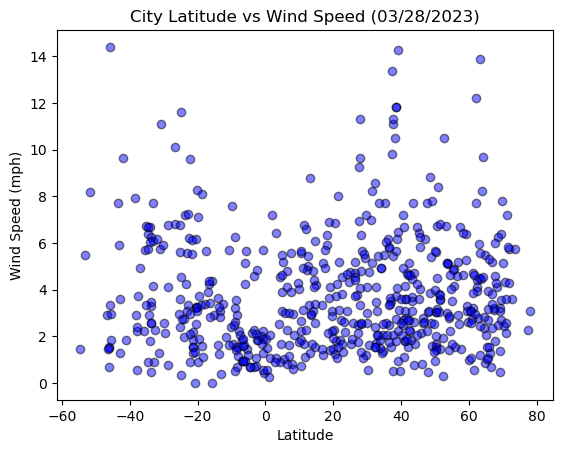

In [13]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) > 0, :]

# Display sample data
northern_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,elk city,US,2023-03-28 12:03:24,35.4120,-99.4043,0.0,52.0,43.052,7.72
4,dakar,SN,2023-03-28 12:03:25,14.6937,-17.4441,7.0,74.0,101.552,6.09
6,guilin,CN,2023-03-28 12:03:25,25.2819,110.2864,100.0,90.0,56.264,1.65
7,nome,US,2023-03-28 12:03:25,64.5011,-165.4064,99.0,98.0,-0.526,2.36
9,qaanaaq,GL,2023-03-28 12:03:26,77.4840,-69.3632,79.0,70.0,-7.402,2.25


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) < 0, :]

# Display sample data
southern_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
1,conceicao do araguaia,BR,2023-03-28 12:03:25,-8.2578,-49.2647,50.0,64.0,86.018,2.92
2,mataura,NZ,2023-03-28 12:03:25,-46.1927,168.8643,47.0,84.0,44.744,0.67
3,bredasdorp,ZA,2023-03-28 12:03:25,-34.5322,20.0403,38.0,67.0,65.714,6.37
5,busselton,AU,2023-03-28 12:03:25,-33.6500,115.3333,0.0,65.0,61.250,6.25
8,bluff,NZ,2023-03-28 12:00:07,-46.6000,168.3333,97.0,63.0,45.068,2.90


**Discussion about the linear relationship:** Notes on the top of each Plot

###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -1.23x + 99.93
The r-squared is: -0.8960044442115057
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


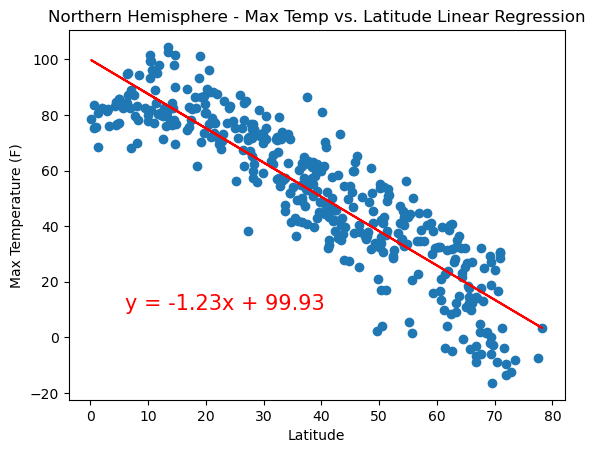

In [16]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.55x + 85.61
The r-squared is: 0.6798344605443088
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


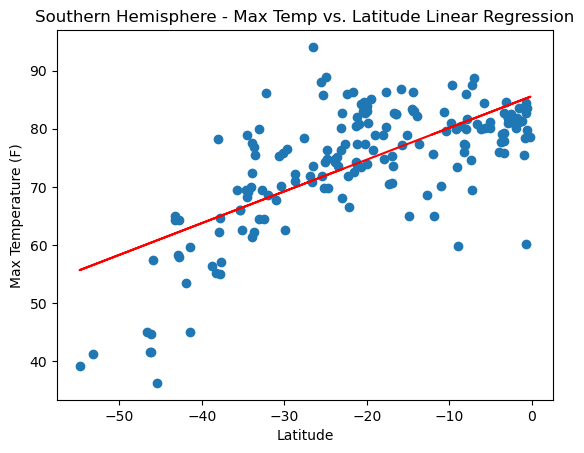

In [32]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.42x + 49.63
The r-squared is: 0.3388553174422518
The regression does not display much of a correlation between the data sets.


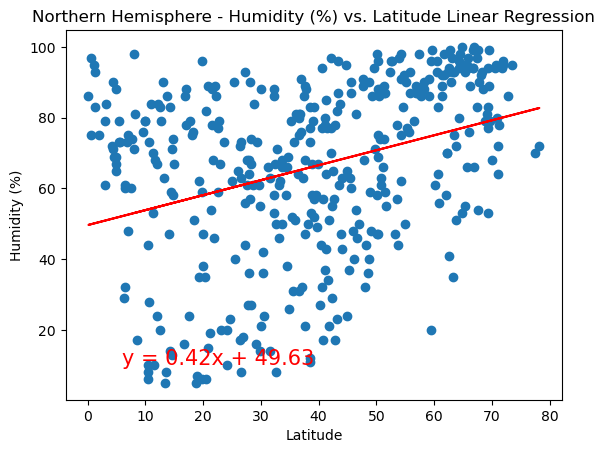

In [17]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.36x + 80.66
The r-squared is: 0.26670935503364945
The regression does not display much of a correlation between the data sets.


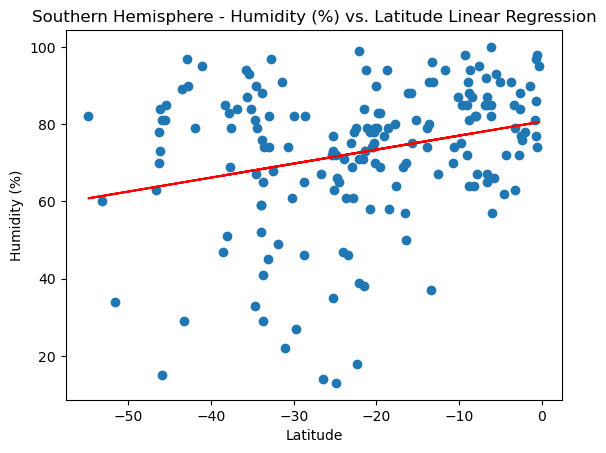

In [18]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.28x + 45.5
The r-squared is: 0.13955593129046964
The regression does not display much of a correlation between the data sets.


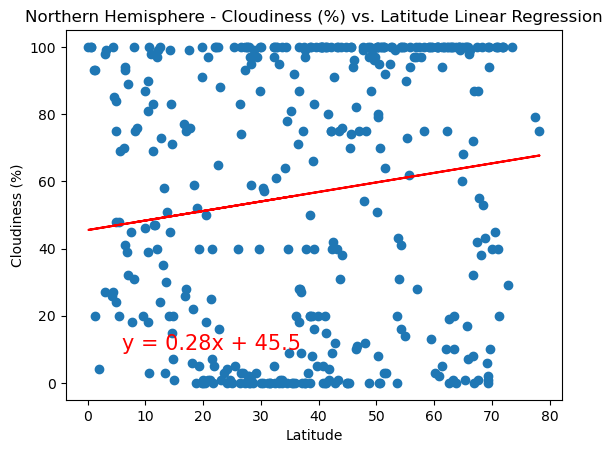

In [19]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.82x + 83.5
The r-squared is: 0.30033789574481046
The regression does not display much of a correlation between the data sets.


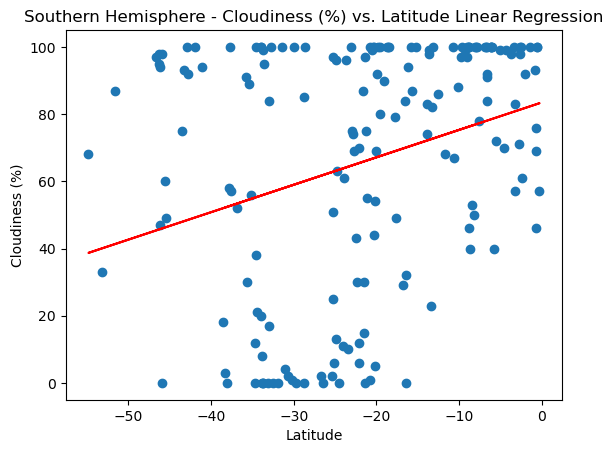

In [20]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 3.42
The r-squared is: 0.08685139158523077
The regression does not display much of a correlation between the data sets.


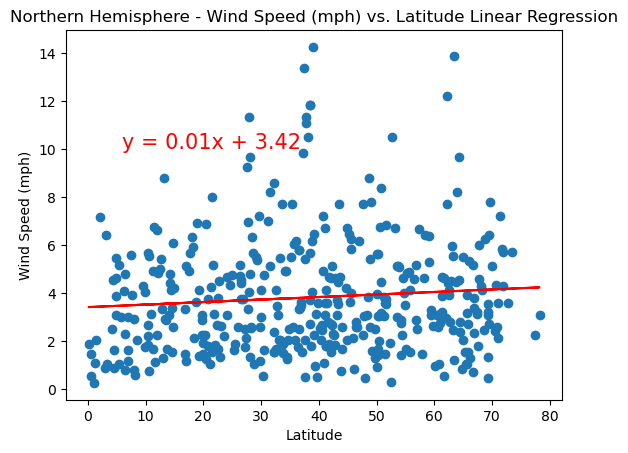

In [21]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = -0.06x + 2.21
The r-squared is: -0.3065376608648709
The regression does not display much of a correlation between the data sets.


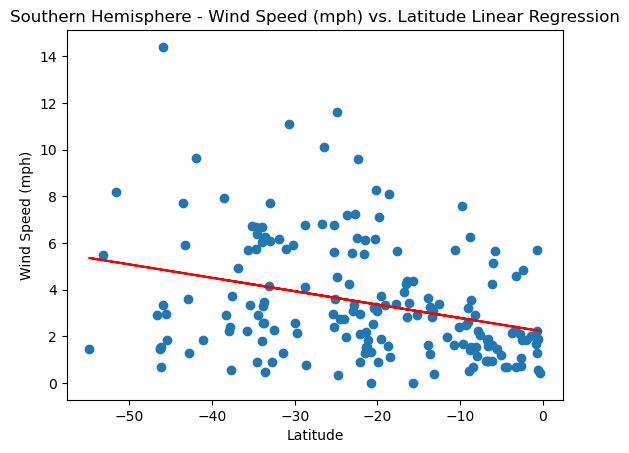

In [22]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()